***Predicting House Prices Using Data Analysis and Machine Learning***

## 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

## 2. Load Dataset

In [2]:
data = pd.read_csv('housing.csv')

## 2. Performing Data Analysis

In [3]:
# first few rows of the dataset
print(data.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [4]:
# last few rows of the dataset
print(data.tail())

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAN

In [5]:
# size of the dataset
data.shape

(20640, 10)

In [6]:
# descriptive statistics
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


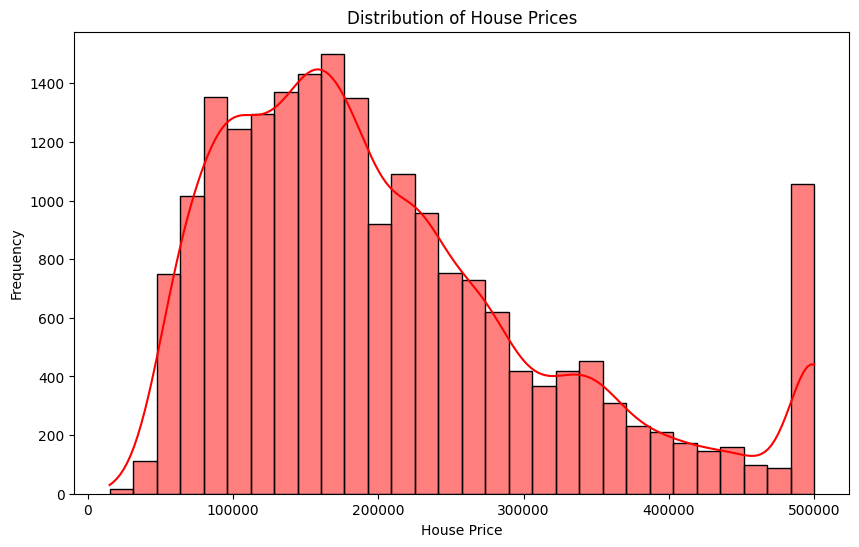

In [8]:
# Visualizing Distribution of Target Variable (MedianHouseValue)
plt.figure(figsize=(10, 6))
sns.histplot(data['median_house_value'], bins=30,color="Red", kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('House Price')
plt.ylabel('Frequency')
plt.show()

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')


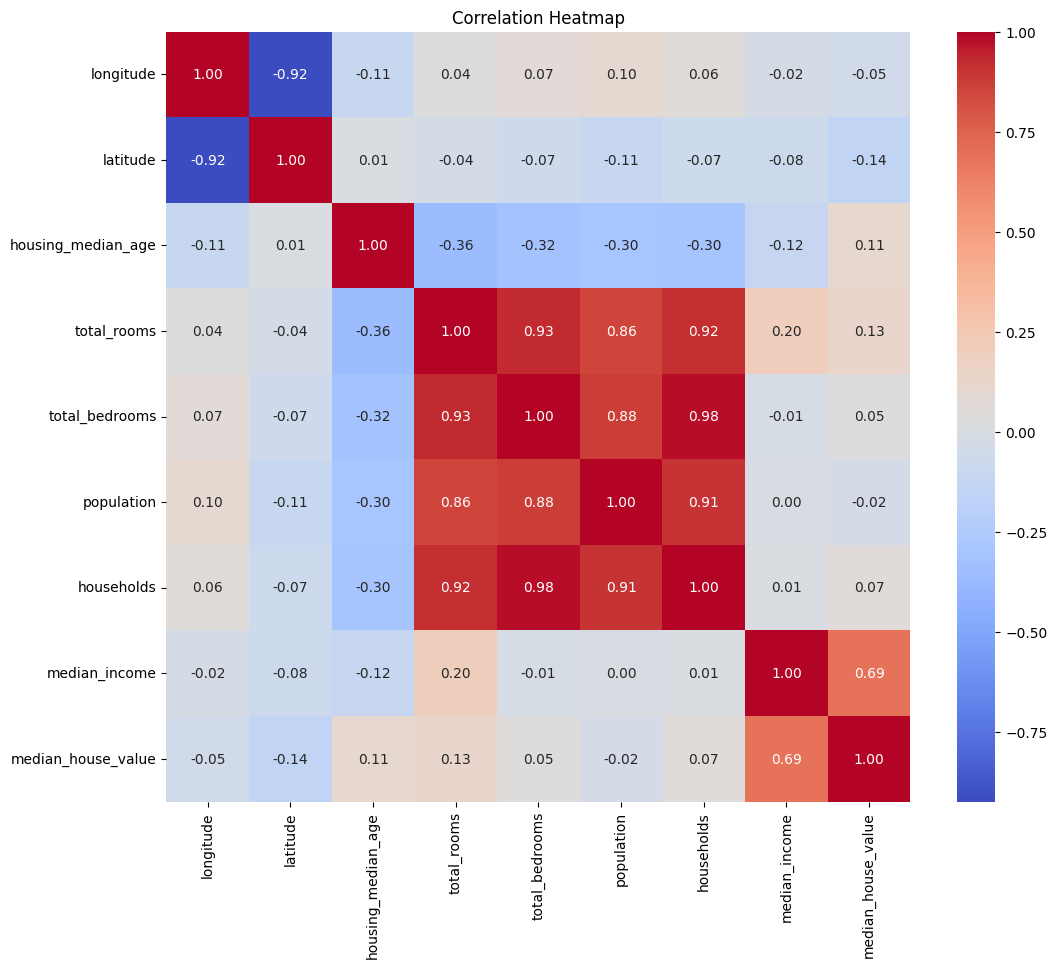

In [9]:
# Correlation Matrix
numeric_data = data.select_dtypes(include=[np.number])
print(numeric_data.columns)
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

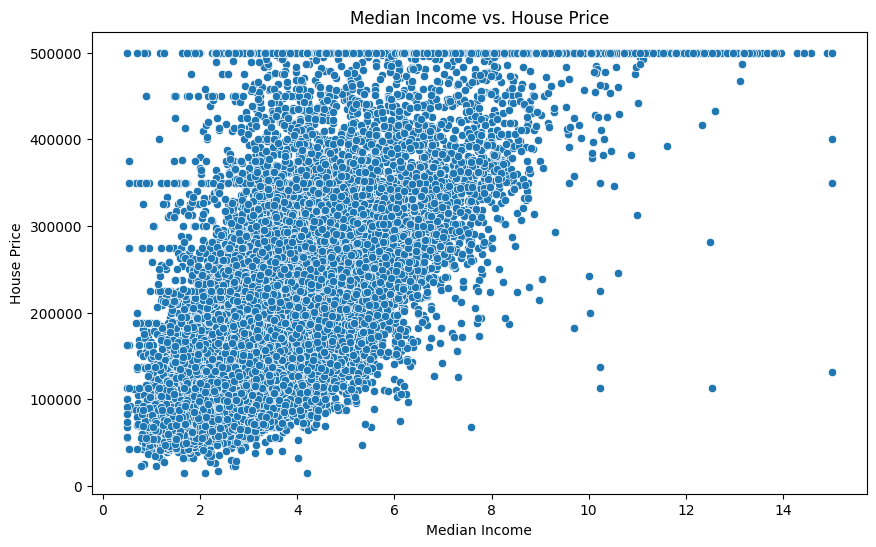

In [10]:
# Scatter Plot: MedianIncome vs. House Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='median_income', y='median_house_value', data=data)
plt.title('Median Income vs. House Price')
plt.xlabel('Median Income')
plt.ylabel('House Price')
plt.show()

## 3. Data Preprocessing

In [11]:
# handling missing values
data = data.dropna()

In [12]:
# Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['median_income', 'total_rooms', 'housing_median_age']])

In [13]:
# Updating the DataFrame with scaled features
data.loc[:, ['median_income', 'total_rooms', 'housing_median_age']] = scaled_features

In [14]:
# train-test split
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Model Building

In [15]:
# Identify categorical columns in your data
categorical_columns = data.select_dtypes(include=['object']).columns
# One-Hot Encode the categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
# Define the features and target variable
X = data_encoded.drop('median_house_value', axis=1)  # Assuming 'median_house_value' is the target
y = data_encoded['median_house_value']
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# linear regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
# making prediction
lr_pred = lr_model.predict(X_test)
# Display predictions
print(lr_pred[:10]) 

[201882.95986765 147279.68214386 207796.60979847 180487.57672192
 190323.92313024  95437.89710398 287156.45161243 257624.77180536
 385383.55615124  62548.19755136]


In [17]:
# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print(rf_pred[:10])

[218618.   151202.   189054.   146361.   166539.    74360.   287635.
 212269.   466673.57  69654.  ]


In [18]:
# Model Evaluation
print('Linear Regression RMSE:', mean_squared_error(y_test, lr_pred, squared=False))
print('Linear Regression R2 Score:', r2_score(y_test, lr_pred))

Linear Regression RMSE: 69297.7166911303
Linear Regression R2 Score: 0.6488402154431994


In [19]:
print('Random Forest RMSE:', mean_squared_error(y_test, rf_pred, squared=False))
print('Random Forest R2 Score:', r2_score(y_test, rf_pred))

Random Forest RMSE: 48779.42178689646
Random Forest R2 Score: 0.8260036172763854


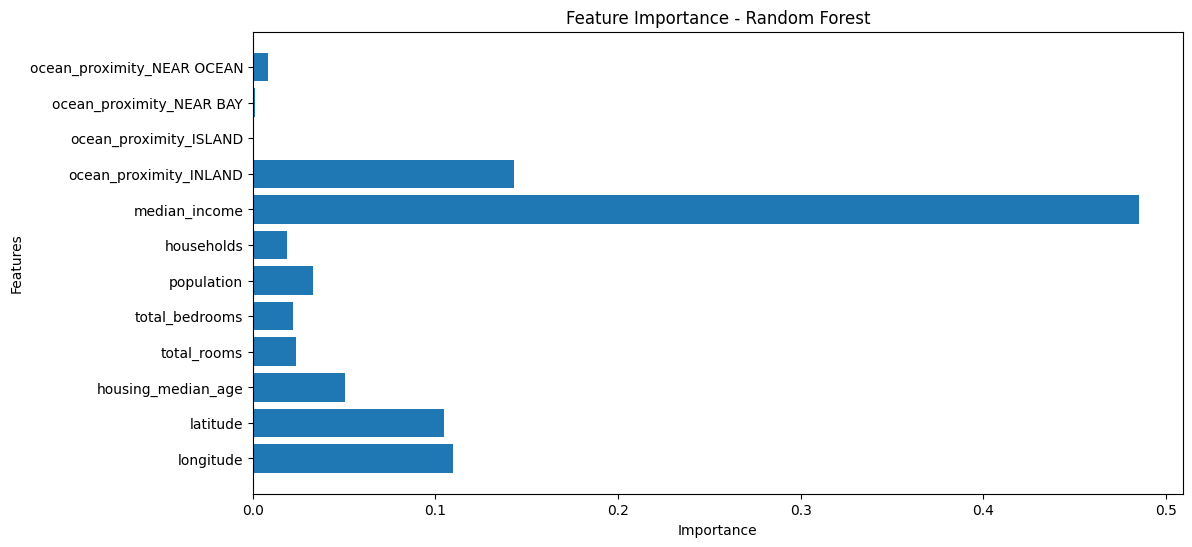

In [20]:
# Feature Importance Visualization for Random Forest
plt.figure(figsize=(12, 6))
plt.barh(X.columns, rf_model.feature_importances_)
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()